# Oasis Infobyte (Data Science Internship)
## Task 4
## Email Spam Detector
### By Saugata Panja

## 1. Loading dataset

In [112]:
# importing pandas to read the dataset
import pandas as pd
#Reading the Iris dataset through pandas
data=pd.read_csv(r"C:\Users\sauga\Desktop\Datasets\spam.csv",encoding = "latin")
df=pd.DataFrame(data)

#Printing the dataset
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## 2. Dropping Unnecessary Columns

In [113]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## 3. Dataset analysis and Cleaning

In [114]:
# Checking shape of dataset
df.shape


(5572, 2)

In [115]:
# Printing coulums' name
df.columns

Index(['v1', 'v2'], dtype='object')

In [116]:
# Description of the dataset
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [117]:
# Info about the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [118]:
# Checking for null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [119]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
        v1                                                 v2
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]


There are duplicate rows. We need to remove them.

In [120]:
#Removing duplicate rows
df=df[~dups]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [121]:
#Checking whether duplicate rows were removed or not
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any()) 

False


In [122]:
df['v1'].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

## 3. Data Visualization

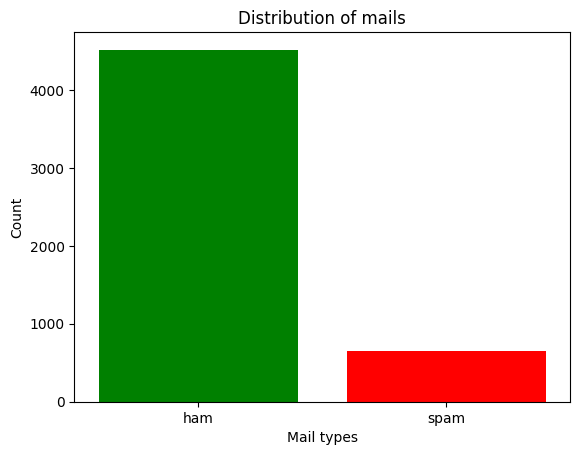

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with two different colors
custom_palette = ["green", "red"]

# Create the countplot with the custom color palette
sns.set_palette(custom_palette)
ax = sns.countplot(data=df, x='v1')

# Set the bar colors manually
bar_colors = custom_palette

# Set the colors for each bar in the countplot
for i, p in enumerate(ax.patches):
    p.set_fc(bar_colors[i % len(bar_colors)])

plt.xlabel('Mail types')
plt.ylabel('Count')
plt.title('Distribution of mails')
plt.show()

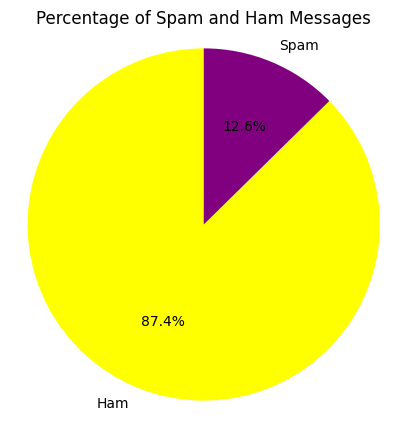

In [124]:
import warnings
warnings.filterwarnings("ignore")
# Count the number of spam and ham messages
spam_count = df['v1'].value_counts()[1]
ham_count = df['v1'].value_counts()[0]

# Create a pie chart to show the percentage of spam and ham messages
plt.figure(figsize=(5, 5))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['yellow', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 4. Encoding for strings

In [125]:
from sklearn.preprocessing import LabelEncoder
# converting Species
le = LabelEncoder()
df["v1"]=le.fit_transform(df["v1"])
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 5. Splitting dataset into trainng set and testing set

In [126]:
X= df["v2"]
Y= df["v1"]

print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int32


In [127]:

# # Vectorize the text data using TF-IDF
# tfidf_vectorizer = TfidfVectorizer()
# X = tfidf_vectorizer.fit_transform(X)

In [128]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TF-IDF vectorizer to convert text messages into numerical features
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [130]:
# Convert the training and testing text messages into numerical features using TF-IDF
X_train = feature_extraction.fit_transform(X_train)
X_test = feature_extraction.transform(X_test)

## 6. Trainning Different ML models

In [143]:
# Importing required modules
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [146]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = log.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Logistic Regression--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

# Decision tree
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = log.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Decision Tree Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
forest  = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
forest.fit(X_train,Y_train)
 # Make predictions on the test set
Y_pred = forest.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Random Forest Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = knn.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------K-Nearest Neighbors Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

#Multinomial Naive Bayes classifier
MnB = MultinomialNB()
MnB.fit(X_train, Y_train)
# Make predictions on the test set
Y_pred = MnB.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Multinomial Naive Bayes classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

# Support Vector Machine
V = SVC()
V.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = V.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Support Vector Machine Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

# Bagging
bgg = BaggingClassifier()
bgg.fit(X_train,Y_train) 
# Make predictions on the test set
Y_pred = bgg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Bagging Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)

# adaboost
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
# Make predictions on the test set
Y_pred = ada.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
print("----------------------------------Ada Boost Classifier--------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:')
print(classification_rep)
  

----------------------------------Logistic Regression--------------------------------------------
Accuracy: 0.9642166344294004
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.76      0.86       145

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034

----------------------------------Decision Tree Classifier--------------------------------------------
Accuracy: 0.9642166344294004
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.76      0.86       145

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034

----------------------------------Random 

Here we can see, Support Vector Classifier is working best for the dataset.

## 7. Checking for customized mails

In [147]:
mail = ["England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+"]
transformed_mail = feature_extraction.transform(mail)
prediction = V.predict(transformed_mail)

if (prediction)[0] == 0:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [148]:
mail = ["This is a friendly reminder about our meeting scheduled for tomorrow at 10:00 AM in the conference room."]
transformed_mail = feature_extraction.transform(mail)
prediction = V.predict(transformed_mail)

if (prediction)[0] == 0:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail
